In [80]:
import pandas as pd
import numpy as np

df = pd.read_excel (r'data1.xlsx') #place "r" before the path string to address special character, such as '\'. Don't forget to put the file name at the end of the path + '.xlsx'

print (df)

        date      description        a     debt   credit   amount
0  2020-09-29  ל.מאסטרקרד(יש)     9597    29.51      NaN -4981.17
1  2020-09-25  מכתב חריגה עוש    67716     5.00      NaN -4951.66
2  2020-09-25  ל.מאסטרקרד(יש)     9597    19.90      NaN -4946.66
3  2020-09-22      שיק 12586   5000008   345.00      NaN -4926.76
4  2020-09-21  ל.מאסטרקרד(יש)     9597    42.26      NaN -4581.76
5  2020-09-10  ל.מאסטרקרד(יש)     9597  4413.17      NaN -4539.50
6  2020-09-08  כספומט פרטי989    80910   506.90      NaN  -126.33
7  2020-09-08  כספומט פרטי989    80910   506.90      NaN   380.57
8  2020-09-08  כספומט פרטי989    80910   506.90      NaN   887.47
9  2020-09-08  כספומט פרטי989    80910   506.90      NaN  1394.37
10 2020-09-08  כספומט פרטי989    80910   106.90      NaN  1901.27
11 2020-09-02  כספומט פרטי989    20915   206.90      NaN  2008.17
12 2020-09-01  הע. אינטרנט700    52215  1000.00      NaN  2215.07
13 2020-09-01  עמל.ערוץ יש 12       12    19.80      NaN  3215.07
14 2020-09

In [81]:
for col in df.columns: 
    print(col) 
    


date 
description
a
debt
credit
amount


In [82]:

data = df[['description', 'amount', 'debt', 'credit']]
debt = data['debt'].count()
print(debt)


19


In [83]:
descriptionCounts = data.groupby("description")["amount"].count()
print(descriptionCounts)


description
הע. אינטרנט700    1
כספומט פרטי989    6
ל.מאסטרקרד(יש)    7
מכתב חריגה עוש    2
סלקום ישראל-י     1
עמל.ערוץ יש 12    1
שיק 12586         2
Name: amount, dtype: int64


In [84]:
TotalDebt = data['debt'].sum()
print(TotalDebt)

8652.78


In [85]:
TotalCredit = data['credit'].sum()
print(TotalCredit)

6665.85


In [96]:
debtCounts = data.groupby("description")["debt"].count()
debtCounts = debtCounts.replace(0, np.nan)
debtCounts = debtCounts.dropna(how='all', axis=0)
debtCounts = debtCounts.replace(np.nan, 0).astype(int)
print(debtCounts)

description
הע. אינטרנט700    1000
כספומט פרטי989    2341
ל.מאסטרקרד(יש)    4591
מכתב חריגה עוש      10
עמל.ערוץ יש 12      19
שיק 12586          690
Name: debt, dtype: int64


In [123]:

debtSums = data.groupby("description")["debt"].sum()

print(debtSums)

description
הע. אינטרנט700    1000.00
כספומט פרטי989    2341.40
ל.מאסטרקרד(יש)    4591.58
מכתב חריגה עוש      10.00
סלקום ישראל-י        0.00
עמל.ערוץ יש 12      19.80
שיק 12586          690.00
Name: debt, dtype: float64


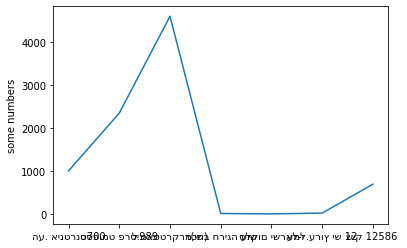

In [101]:
import matplotlib.pyplot as plt
plt.plot(debtSums)
plt.ylabel('some numbers')
plt.show()

In [144]:
values = data[['debt', 'description']].dropna()
values = values.groupby('description').sum()
print(values)


names = data['description'].drop_duplicates()
names = names.tolist()
print(names)



                   debt
description            
הע. אינטרנט700  1000.00
כספומט פרטי989  2341.40
ל.מאסטרקרד(יש)  4591.58
מכתב חריגה עוש    10.00
עמל.ערוץ יש 12    19.80
שיק 12586        690.00
['ל.מאסטרקרד(יש)', 'מכתב חריגה עוש', 'שיק 12586 ', 'כספומט פרטי989', 'הע. אינטרנט700', 'עמל.ערוץ יש 12', 'סלקום ישראל-י']


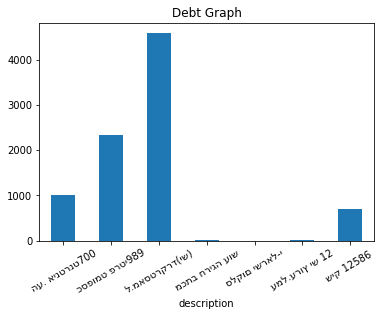

In [153]:
debtSums.plot.bar(x="description", y="debt", rot=30, title="Debt Graph");

#plot.show(block=True);

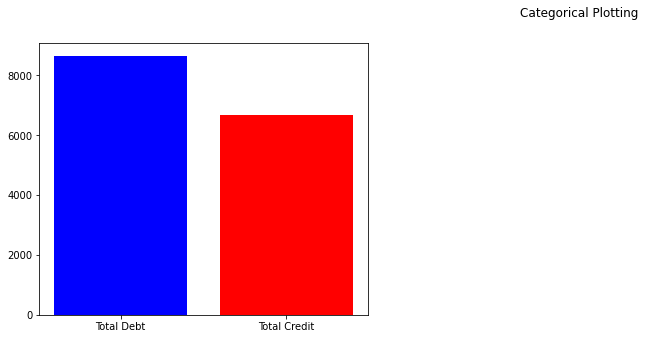

In [167]:
values = []
values.append(TotalDebt)
values.append(TotalCredit)
names = ["Total Debt", "Total Credit"]

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=('blue', 'red'))


plt.suptitle('Categorical Plotting')
plt.show()